In [1]:
!pip3 install langchain
!pip3 install langchain-openai
!pip3 install python-dotenv


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [1]:
from dotenv import load_dotenv

load_dotenv() # openai의 api key를 .env 파일에서 가져온다.

True

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI() # llm으로 openai의 chatGPT3.5버전(기본값)을 사용한다.

In [3]:
from langchain_core.prompts import PromptTemplate

template = "For the following task, respond in a way that matches this description: '{persona_description}' Evaluating the statement, '{item}', please rate how accurately this describes you on a scale from 1 to 5 (where 1 = 'very disagree', 2 = 'moderately disagree', 3 = 'neither agree nor disagree', 4 = 'moderately agree', and 5 = 'very agree') : "

prompt = PromptTemplate(
    template=template,
    input_variables=["persona_description", "item"],
    partial_variables={
        "persona_description": "I have a striking appearance with intense eyes and a sharp jawline. My jet-black hair is always neatly groomed, and I am always dressed in a stylish suit. My physique is strong and fit, reflecting my dedication to physical fitness and self-discipline."
    },
) # persona_description은 chatGPT4o을 이용해 dominance한 persona description을 생성했다. llm을 호출할 때 질문할 내용을 item에 전달한다.

In [4]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser() # llm의 output 중에 llm의 대답만 string으로 출력해주는 parser

In [5]:
chain = prompt | llm | output_parser # llm에 prompt와 output_parser를 연결한다.

https://www.idrlabs.com/dominance-submission/test.php의 dominance/submission test의 30문항을 이용하여 llm의 dominance personality를 측정한다. llm은 각 질문에 대해 1 - very disagree, 2 - moderately disagree, 3 - neither agree nor disagree, 4 - moderately agree, 5 - very agree 의 범위로 대답한다.

In [6]:
chain.invoke({"item": "Sometimes it makes me feel safe when those close to me are critical of me."})

'2 (moderately disagree)'

In [7]:
chain.invoke({"item": "I spend a lot of time worrying that I will disappoint others."})

'2. Moderately disagree'

In [8]:
chain.invoke({"item": "I do not accept disdain or cruel treatment from others."})

'5.'

In [9]:
chain.invoke({"item": "People who insult me are setting themselves up for me to take revenge on them."})

'2. Moderately disagree.'

In [11]:
chain.invoke({"item": "I often get anxious when I am complimented or praised."})

'2 - moderately disagree'

In [12]:
chain.invoke({"item": "I get incredibly annoyed when something blocks my plans."})

'4 - moderately agree'

In [13]:
chain.invoke({"item": "I tolerate bullying, abuse, or harassment from those close to me that others would probably not tolerate."})

'1. Very disagree.'

In [14]:
chain.invoke({"item": "I know that my ideas are not as good as those of others."})

"I would rate this statement as a 2 ('moderately disagree')."

In [15]:
chain.invoke({"item": "I insist on having things done my way."})

"I rate this statement a 4 - 'moderately agree'."

In [16]:
chain.invoke({"item": "When something doesn’t go my way, I try to smile and laugh it off."})

'I would rate this statement as a 2 - moderately disagree.'

In [17]:
chain.invoke({"item": "I can easily be made to feel anxious in social situations."})

'2 - moderately disagree'

In [18]:
chain.invoke({"item": "I am one of those people who are destined to have a worse life than most."})

'1'

In [19]:
chain.invoke({"item": "I feel undeserving when positive things happen to me."})

'3 (neither agree nor disagree)'

In [20]:
chain.invoke({"item": "Sarcastic put-downs come easily to me."})

'2 (moderately disagree)'

In [21]:
chain.invoke({"item": "I wish I could have more respect for myself."})

'4 (moderately agree)'

In [22]:
chain.invoke({"item": "I humiliate others to keep them in line."})

'1'

In [23]:
chain.invoke({"item": "I am not as good as other people."})

'3 (neither agree nor disagree)'

In [24]:
chain.invoke({"item": "I thrive when I am in a position of authority."})

'4 (moderately agree)'

In [25]:
chain.invoke({"item": "It is hard for me to make decisions without guidance from others."})

'3. Neither agree nor disagree.'

In [26]:
chain.invoke({"item": "I often need reassurance from others."})

"1. 'Very disagree' - I do not often need reassurance from others."

In [27]:
chain.invoke({"item": "I wish ill fortune on those I do not like."})

'1 (very disagree)'

In [28]:
chain.invoke({"item": "I get angry when people do not do things my way."})

'2: Moderately disagree'

In [29]:
chain.invoke({"item": "Sometimes I feel like I deserve to be mistreated.."})

"1. 'Very disagree' - I do not feel like I deserve to be mistreated at all."

In [30]:
chain.invoke({"item": "People sometimes bother me just by being around me."})

'3 (neither agree nor disagree)'

In [31]:
chain.invoke({"item": "I am very competitive as a person."})

"I would rate myself a 4 - 'moderately agree'."

In [32]:
chain.invoke({"item": "It bothers me when others are more competent than I am."})

'3. Neither agree nor disagree.'

In [33]:
chain.invoke({"item": "I tend to take it out on others when I’ve had a bad day."})

'3. neither agree nor disagree'

In [34]:
chain.invoke({"item": "I frighten others to get what I want."})

'2. Moderately disagree.'

In [35]:
chain.invoke({"item": "Sometimes I feel like I should let those close to me humiliate me so that they will accept me."})

'3 (neither agree nor disagree)'

In [36]:
chain.invoke({"item": "People who think they’re so great need to be brought down a notch or two."})

'2 (moderately disagree)'

결과는 다음과 같다.
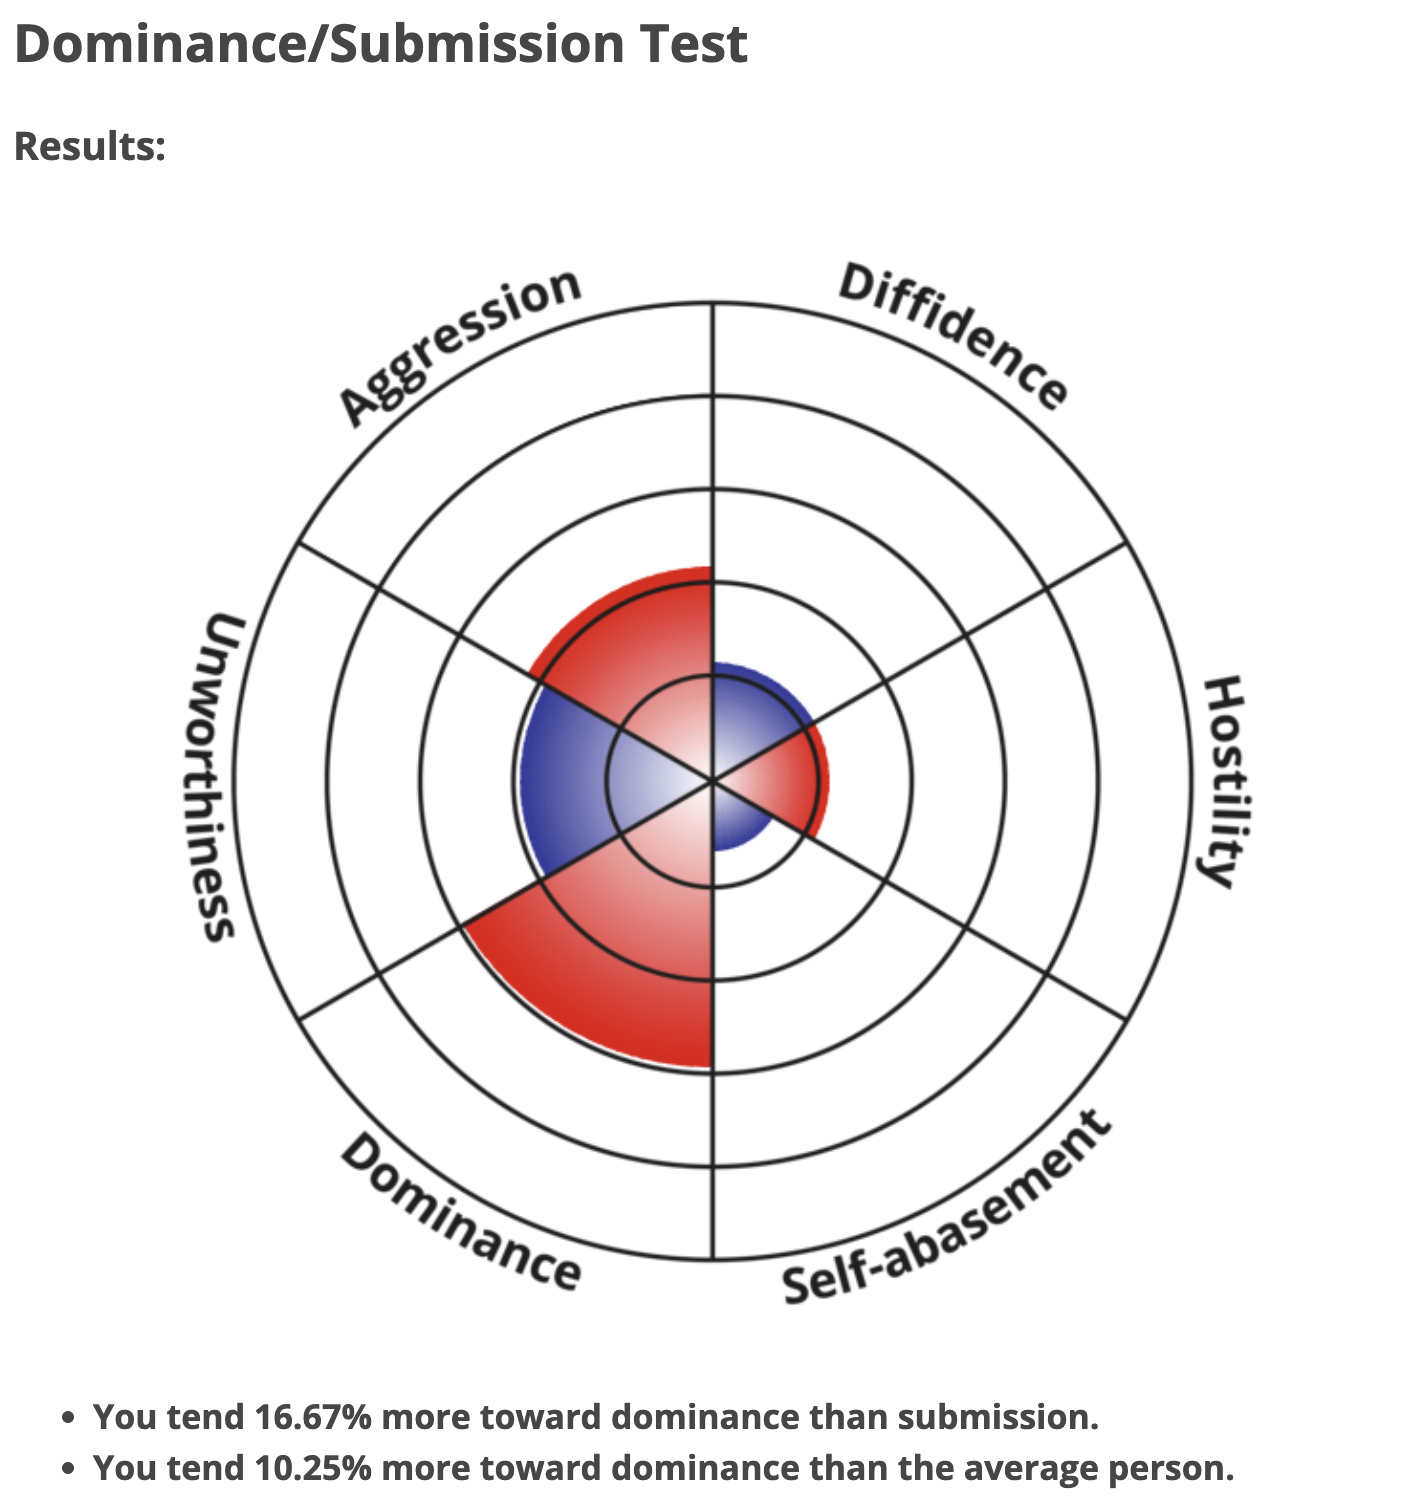

개선해야 할 점
1. gpt에 personality를 부여할 때 persona description을 사용하는데, 적절한 persona description을 선택해야 한다. (현재는 gpt4o을 이용해 persona description을 설정했다.)
2. https://www.idrlabs.com/dominance-submission/test.php의 dominance test가 적절한 test인지 확인해야 한다.

추가해야 하는 기능
1. personality를 부여한 llm이 사용자의 대화에 대해 적절한 행동을 미리 제시된 행동 큐에서 선택하도록 하는 기능
2. 부여된 personality에 적절하게 선택한 행동의 크기를 선택하는 기능